In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## a. Download dataset

In [79]:
data=pd.read_csv("input/HousePrice.csv")
data.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


## b. Preprocess data 

In [80]:
#  delete duplicate data

data[data.duplicated()]
data.drop_duplicates(inplace=True)
data.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [81]:
# delete null data

print(data.isnull().sum())
data.dropna(inplace=True)
print(data.isnull().sum())
data.reset_index(drop = True, inplace = True)

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64
Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address       0
Price         0
Price(USD)    0
dtype: int64


## C. Show the address of the 5 most expensive houses

In [82]:
df=data.sort_values(by='Price', ascending=False)
most_expensive=df[['Address','Price','Price(USD)']]
most_expensive=most_expensive.head(5)

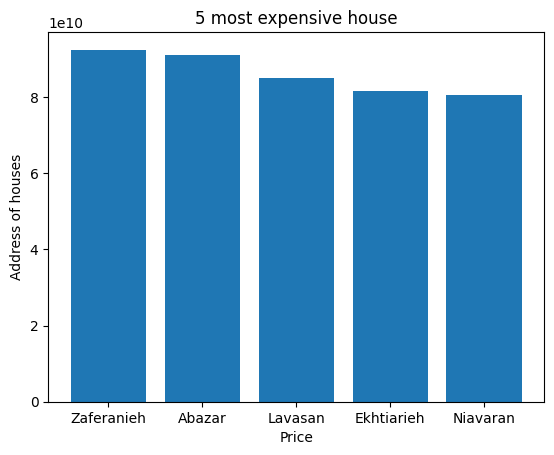

In [83]:
plt.bar(most_expensive['Address'],most_expensive['Price'])
plt.title("5 most expensive house")
plt.xlabel("Price")
plt.ylabel("Address of houses")
plt.show()

In [84]:
df.columns


Index(['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price',
       'Price(USD)'],
      dtype='object')

## d. Use all possible features for X_train

In [94]:
address_dummy = pd.get_dummies(df['Address'])
df_final = df.merge(address_dummy, left_index = True, right_index = True)
df_final.drop(columns = 'Address', inplace = True)
df_final.head(3)

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD),Abazar,Abbasabad,Absard,...,Waterfall,West Ferdows Boulevard,West Pars,Yaftabad,Yakhchiabad,Yousef Abad,Zafar,Zaferanieh,Zargandeh,Zibadasht
1606,420,4,True,True,True,9.240000e+10,3080000.00,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1704,705,5,True,True,False,9.100000e+10,3033333.33,True,False,False,...,False,False,False,False,False,False,False,False,False,False
405,400,5,True,True,False,8.500000e+10,2833333.33,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [93]:
df_final.columns[2]
for i in range(2,len(df_final.columns)):
    df_final[df_final.columns[i]]=df_final[df_final.columns[i]].replace([True,False],[1,0])
    df_final[df_final.columns[i]]=df_final[df_final.columns[i]].replace(['True','False'],[1,0])
df_final1=df_final[[df_final.columns[0],df_final.columns[1],df_final.columns[2],df_final.columns[3],df.columns[4]]]
df_final.head()
df_final.corr()

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD),Abazar,Abbasabad,Absard,...,Waterfall,West Ferdows Boulevard,West Pars,Yaftabad,Yakhchiabad,Yousef Abad,Zafar,Zaferanieh,Zargandeh,Zibadasht
Area,1.000000,0.670121,0.200009,0.072364,0.047034,0.720935,0.720935,0.021135,-0.011455,0.248290,...,-0.003305,-0.083698,-0.001399,-0.005622,-0.010328,0.013915,0.062898,0.114138,0.006714,0.001808
Room,0.670121,1.000000,0.278743,0.125894,0.181826,0.569738,0.569738,0.023911,-0.019090,0.004432,...,0.009762,-0.088803,0.014094,-0.002018,-0.002018,0.069892,0.029959,0.091499,0.007446,-0.002018
Parking,0.200009,0.278743,1.000000,0.429241,0.428801,0.193761,0.193761,0.036181,0.010635,-0.001407,...,-0.043059,0.054140,0.010312,0.007519,-0.041038,0.038692,-0.006943,0.039225,0.015044,0.007519
Warehouse,0.072364,0.125894,0.429241,1.000000,0.205098,0.109370,0.109370,0.025887,0.007609,-0.012444,...,-0.026911,0.041127,-0.001075,0.005380,0.005380,0.033353,0.017035,0.028066,0.010764,0.005380
Elevator,0.047034,0.181826,0.428801,0.205098,1.000000,0.110310,0.110310,0.035200,0.012978,-0.082432,...,0.015898,-0.032165,0.017554,0.009176,-0.033627,0.008004,0.001948,0.047871,0.018360,0.009176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yousef Abad,0.013915,0.069892,0.038692,0.033353,0.008004,0.020518,0.020518,-0.009206,-0.002706,-0.004689,...,-0.003314,-0.022525,-0.006354,-0.001913,-0.001913,1.000000,-0.006058,-0.009980,-0.003828,-0.001913
Zafar,0.062898,0.029959,-0.006943,0.017035,0.001948,0.051787,0.051787,-0.004702,-0.001382,-0.002395,...,-0.001693,-0.011505,-0.003246,-0.000977,-0.000977,-0.006058,1.000000,-0.005097,-0.001955,-0.000977
Zaferanieh,0.114138,0.091499,0.039225,0.028066,0.047871,0.200554,0.200554,-0.007746,-0.002277,-0.003946,...,-0.002789,-0.018954,-0.005347,-0.001610,-0.001610,-0.009980,-0.005097,1.000000,-0.003221,-0.001610
Zargandeh,0.006714,0.007446,0.015044,0.010764,0.018360,0.006775,0.006775,-0.002971,-0.000873,-0.001513,...,-0.001070,-0.007270,-0.002051,-0.000617,-0.000617,-0.003828,-0.001955,-0.003221,1.000000,-0.000617


## E. Split your dataset to train and test with train_test_split function

In [96]:
from sklearn.model_selection import train_test_split

y=df[[df.columns[6]]]

X_train, X_test,Y_train, Y_test=train_test_split(df_final1,y,test_size=0.2)

# X_trainDirty = X_train+0.0001*np.random.rand(2593, 197)
# X_testDirty = X_test+0.0001*np.random.rand(649, 197)

print(f"shape of x train: {X_train.shape}")
print(f"shape of y train: {Y_train.shape}")
print(f"shape of x test: {X_test.shape}")
print(f"shape of y test: {Y_test.shape}")

shape of x train: (2593, 5)
shape of y train: (2593, 1)
shape of x test: (649, 5)
shape of y test: (649, 1)


## F. Fit the LLS model on your training dataset

In [97]:
from lls import LinearLeastSquare

# llss=LinearRegression()
# llss.fit(X_train,Y_train)

# y_preds=llss.predict(X_test)
mylls=LinearLeastSquare()
w=mylls.fit(X_train,Y_train)
print(type(w))


<class 'pandas.core.frame.DataFrame'>


## G. Evaluate your model on your test dataset using MAE, MSE and RMSE loss functions. Why the MSE metric is a very large number?

In [103]:
y_pred=mylls.predict(X_test)
mae=mylls.evaluate(Y_test,y_pred,metric='mae')
mse=mylls.evaluate(Y_test,y_pred,metric='mse')
rmse=mylls.evaluate(Y_test,y_pred,metric='rmse')
print(f"MAE of my LLS is:  {mae}")
print(f"MSE of my LLS is:  {mse}")
print(f"RMSE of my LLS is:  {rmse}")

MAE of my LLS is:  2930688119.6042976
MSE of my LLS is:  3.438959156695921e+19
RMSE of my LLS is:  5864263940.765219


###  As you see MSE is a large number because there is a square in its formula but two other dont have square. 

## H.Compare your result with Scikit-Learn's results

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [102]:
clf = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1])
clf.fit(X_train,Y_train)
Y_pred_ridgcv=clf.predict(X_test)
mae_ridgcv=mean_absolute_error(Y_test, Y_pred_ridgcv)
mse_ridgcv=mean_squared_error(Y_test, Y_pred_ridgcv)
rmse_ridgcv=np.sqrt(mse_ridgcv)


In [101]:
clf = LinearRegression()
clf.fit(X_train,Y_train)
Y_pred_ridgcv=clf.predict(X_test)
mae_ridgcv=mean_absolute_error(Y_test, Y_pred_ridgcv)
mse_ridgcv=mean_squared_error(Y_test, Y_pred_ridgcv)
rmse_ridgcv=np.sqrt(mse_ridgcv)

print(f"MAE of my LLS is:  {mae}")
print(f"MSE of my LLS is:  {mse}")
print(f"RMSE of my LLS is:  {rmse}")
print()
print()
print(f"MAE of RidgeCV is:  {mae_ridgcv}")
print(f"MSE of RidgeCV is:  {mse_ridgcv}")
print(f"RMSE of RidgeCV is:  {rmse_ridgcv}")
print()
print()
print(f"MAE of LinearRegression is:  {mae_ridgcv}")
print(f"MSE of LinearRegression is:  {mse_ridgcv}")
print(f"RMSE of LinearRegression is:  {rmse_ridgcv}")

MAE of my LLS is:  2930688119.6042976
MSE of my LLS is:  3.438959156695921e+19
RMSE of my LLS is:  5864263940.765219


MAE of RidgeCV is:  2904911211.6770363
MSE of RidgeCV is:  3.0727363607843246e+19
RMSE of RidgeCV is:  5543226822.694815


MAE of LinearRegression is:  2904911211.6770363
MSE of LinearRegression is:  3.0727363607843246e+19
RMSE of LinearRegression is:  5543226822.694815



|  ------------------Result of 3 model for Tehran House Price------------------        |
|-------------------------------------------------------------------------|

|                  |     MAE    |           MSE           |   RMSE     | 
|------------------|------------|-------------------------|------------|
|      My LLS      | 2930688119 | 3.438959156695921e+19   | 5864263940 |
|      RidgeCV     | 2904911211 | 3.0727363607843246e+19  | 5543226822 |
| LinearRegression | 2904911211 | 3.0727363607843246e+19  | 5543226822 |